In [1]:
%cd ..

/home/hien/Documents/models/yolov4


In [2]:
import math
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
from torch.optim import lr_scheduler

# CosineAnnealingLR

/home/hien/.pyenv/versions/3.9.2/envs/yolov4/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:129: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "
/home/hien/.pyenv/versions/3.9.2/envs/yolov4/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:508: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


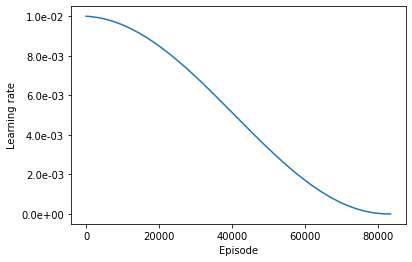

In [3]:
x = []
y = []

net = nn.Linear(10, 10)
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
cus_lr_scheduler = lr_scheduler.CosineAnnealingLR(optimizer, T_max=120, eta_min=0.000001)
for i in range(120):
    cus_lr_scheduler.step()
    for j in range(3):
        x.append(i)
        y.append(cus_lr_scheduler.get_lr()[0])
        optimizer.step()

fig = plt.figure()
ax = fig.add_subplot(111)

x = np.array(x)*700
y = np.array(y)

ax.plot(x, y)
ax.yaxis.set_major_formatter(tick.FormatStrFormatter('%.1e'))
ax.set_ylabel('Learning rate')
ax.set_xlabel('Episode')
plt.show()

/home/hien/.pyenv/versions/3.9.2/envs/yolov4/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:129: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "
/home/hien/.pyenv/versions/3.9.2/envs/yolov4/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:247: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


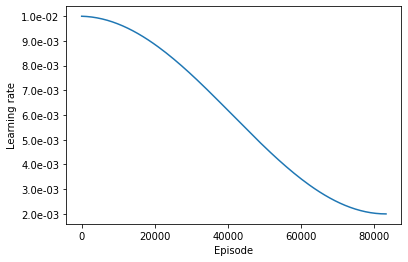

In [4]:
x = []
y = []

net = nn.Linear(10, 10)
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
cus_lr_scheduler = lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda x: (((1 + math.cos(x * math.pi / 120)) / 2) ** 1.0) * 0.8 + 0.2)

for i in range(120):
    cus_lr_scheduler.step()
    for j in range(3):
        x.append(i)
        y.append(cus_lr_scheduler.get_lr()[0])
        optimizer.step()

fig = plt.figure()
ax = fig.add_subplot(111)

x = np.array(x)*700
y = np.array(y)

ax.plot(x, y)
ax.yaxis.set_major_formatter(tick.FormatStrFormatter('%.1e'))
ax.set_ylabel('Learning rate')
ax.set_xlabel('Episode')
plt.show()

# WarmupCosineAnnealingLR

/home/hien/.pyenv/versions/3.9.2/envs/yolov4/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:129: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


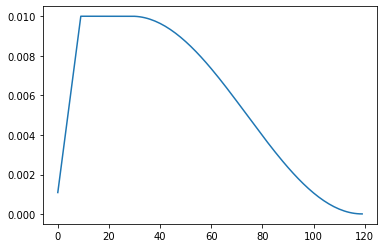

In [5]:
x = []
y = []
from schedulers.warmup import WarmupCosineAnnealingLR
cus_lr_scheduler = WarmupCosineAnnealingLR(optimizer, max_iters=120, delay_iters=30, eta_min_lr=0.00001, warmup_factor=0.01, warmup_iters=10, warmup_method="linear")
for i in range(120):
    cus_lr_scheduler.step()
    for j in range(3):
        x.append(i)
        y.append(cus_lr_scheduler.get_lr()[0])
        optimizer.step()
plt.plot(x, y)
plt.show()

# WarmupMultiStepLR

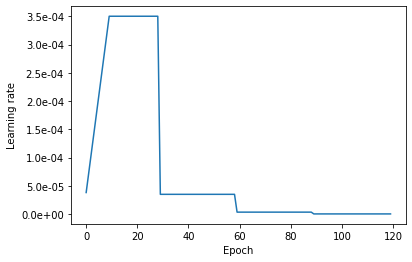

In [6]:
x = []
y = []

from schedulers.warmup import WarmupMultiStepLR
optimizer = torch.optim.SGD(net.parameters(), lr=0.00035)
cus_lr_scheduler = WarmupMultiStepLR(optimizer, milestones=[30, 60, 90], gamma=0.1, warmup_factor=0.01, warmup_iters=10)
for i in range(120):
    cus_lr_scheduler.step()
    for j in range(3):
        x.append(i)
        y.append(optimizer.param_groups[-1]['lr'])
        optimizer.step()

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x, y)
ax.yaxis.set_major_formatter(tick.FormatStrFormatter('%.1e'))
ax.set_ylabel('Learning rate')
ax.set_xlabel('Epoch')
plt.show()

# CosineAnnealingWarmRestarts

/home/hien/.pyenv/versions/3.9.2/envs/yolov4/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:971: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


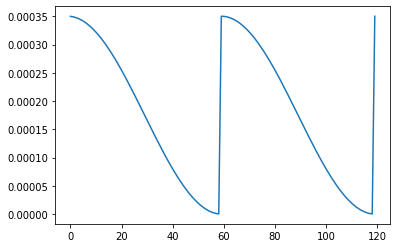

In [7]:
x = []
y = []
cus_lr_scheduler = lr_scheduler.CosineAnnealingWarmRestarts(optimizer,  T_0=60, T_mult=1, eta_min=0)
for i in range(120):
    cus_lr_scheduler.step()
    for j in range(3):
        x.append(i)
        y.append(cus_lr_scheduler.get_lr()[0])
        optimizer.step()
plt.plot(x, y)
plt.show()

# CosineLR

In [8]:
class CosineLR(object):
    def __init__(self, min_lr, base_lr, max_iters):
        self.min_lr = min_lr
        self.base_lr = base_lr
        self.max_iters = max_iters

    def get(self, iter):
        return self.min_lr + 0.5 * (self.base_lr - self.min_lr)*(1 + math.cos(math.pi * iter/self.max_iters))

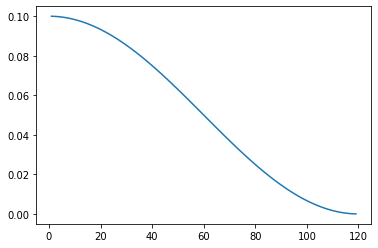

In [9]:
a = np.arange(1, 120, 1)
lr_scheduler = CosineLR(0, 0.1, 120)
b = np.array([lr_scheduler.get(x) for x in a])

plt.plot(a, b)
plt.show()

# CosineAnnealingLR

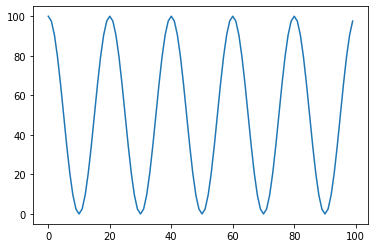

In [10]:
model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=100)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10, eta_min=0)
lrs = []

for i in range(100):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"])
    scheduler.step()

plt.plot(lrs)


# CyclicLR (triangular)

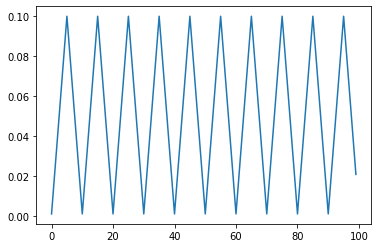

In [11]:
model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.001, max_lr=0.1,step_size_up=5,mode="triangular")
lrs = []


for i in range(100):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"])
#     print("Factor = ",i," , Learning Rate = ",optimizer.param_groups[0]["lr"])
    scheduler.step()

plt.plot(lrs)

# CyclicLR (triangular2)

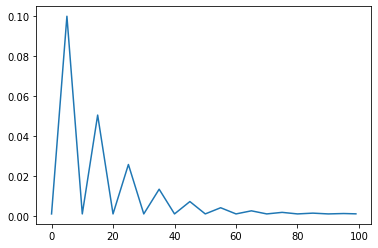

In [12]:
model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.001, max_lr=0.1,step_size_up=5,mode="triangular2")
lrs = []

for i in range(100):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"])
    scheduler.step()

plt.plot(lrs)

# CyclicLR (exp_range)

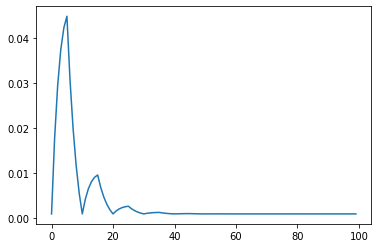

In [13]:
model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=100)
scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.001, max_lr=0.1,step_size_up=5,mode="exp_range",gamma=0.85)
lrs = []

for i in range(100):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"])
    scheduler.step()

plt.plot(lrs)

# OneCycleLR

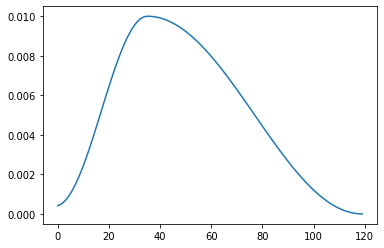

In [14]:
import math
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
from torch.optim import lr_scheduler

model = torch.nn.Linear(2, 1)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, betas=(0.9, 0.999))
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.01, steps_per_epoch=514, epochs=120)
lrs = []

for i in range(120):
    for j in range(514):
        optimizer.step()
        scheduler.step() # call here not end of epoch
    lrs.append(optimizer.param_groups[0]["lr"])

plt.plot(lrs)

# OneCycleLR (linear)

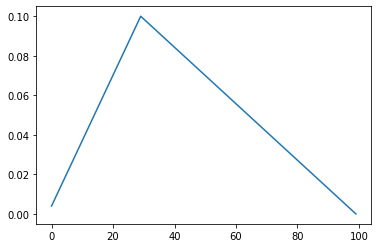

In [15]:
model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.1, steps_per_epoch=10, epochs=10,anneal_strategy='linear')
lrs = []

for i in range(100):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"])
    scheduler.step()

plt.plot(lrs)

# CosineAnnealingWarmRestarts

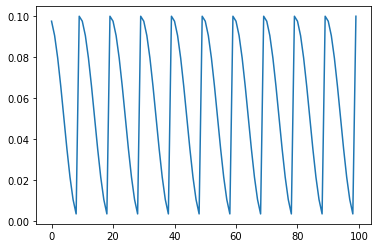

In [16]:
import torch
import matplotlib.pyplot as plt

model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
lr_sched = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=1, eta_min=0.001, last_epoch=-1)

lrs = []

for i in range(100):
    lr_sched.step()
    lrs.append(
        optimizer.param_groups[0]["lr"]
    )

plt.plot(lrs)

# CosineAnnealingWarmRestarts

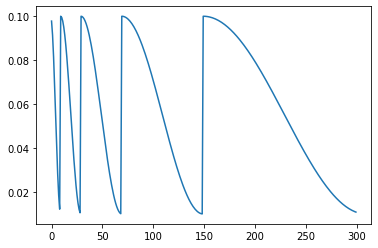

In [17]:
import torch
import matplotlib.pyplot as plt

model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
lr_sched = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2, eta_min=0.01, last_epoch=-1)

lrs = []

for i in range(300):
    lr_sched.step()
    lrs.append(
        optimizer.param_groups[0]["lr"]
    )

plt.plot(lrs)